<a href="https://colab.research.google.com/github/bioadex/python-project/blob/main/Spot_DE_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Next, we'll load your Excel file, `Historical_Data.xlsx`, and specify the exact sheet you want to work with, which is 'DE_Spot_2023_02.2026'. Pandas reads this data and puts it into a structure called a DataFrame, which is like a table.

In [2]:
# Define the file path and sheet name
file_path = 'Historical_Data.xlsx'
sheet_name = 'DE_Spot_2023_02.2026'

# Load the specific sheet from the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows to confirm it loaded correctly
print(f"Successfully loaded sheet '{sheet_name}' from '{file_path}'.")
display(df.head())

Successfully loaded sheet 'DE_Spot_2023_02.2026' from 'Historical_Data.xlsx'.


,NaN,DLS,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00,Base,Date
0,Germany,NaN,-5.17,-1.07,-1.47,-5.08,-4.49,-5.40,-5.02,-1.30,...,36.54,46.03,55.57,54.95,49.23,44.99,45.96,35.00,14.9133,2023-01-01
1,2023-01-01 00:00:00,NaN,57.91,51.67,52.93,44.09,50.08,69.72,105.08,140.64,...,162.89,170.00,174.74,164.46,153.00,141.67,134.91,124.22,123.8200,2023-01-02
2,NaN,NaN,130.01,120.00,118.76,115.00,113.63,116.27,138.92,159.92,...,166.61,170.72,168.93,160.99,149.62,130.99,114.27,93.66,145.9546,2023-01-03
3,ascending,NaN,80.89,70.67,40.00,8.68,0.85,11.02,61.02,79.20,...,80.82,86.16,72.28,66.61,43.20,31.25,34.96,9.09,58.9417,2023-01-04
4,EUR,NaN,0.05,0.07,0.07,0.12,2.23,10.07,61.04,87.19,...,172.73,194.70,194.67,177.98,163.99,152.00,144.64,127.00,107.4554,2023-01-05


Let's visualize the '01:00-02:00' values against the 'Date'. We'll use `matplotlib` for this, a popular plotting library in Python.

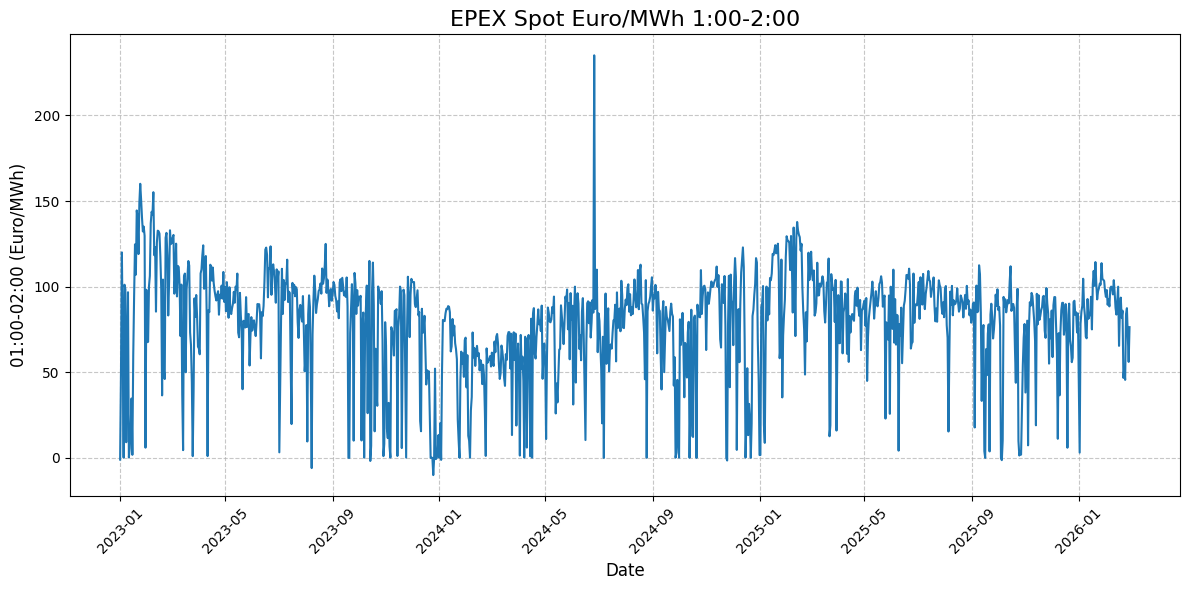

In [7]:
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format for proper plotting
df_selected['Date'] = pd.to_datetime(df_selected['Date'])

# Create the plot
plt.figure(figsize=(12, 6)) # Set a good figure size
plt.plot(df_selected['Date'], df_selected['01:00-02:00'])

# Set the title and labels
plt.title('EPEX Spot Euro/MWh 1:00-2:00', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('01:00-02:00 (Euro/MWh)', fontsize=12)

# Add grid and rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Display the plot
plt.show()

To create an interactive plot that allows for zooming and panning, we'll use the `plotly.express` library. This will display both '12:00-13:00' and '18:00-19:00' values against the 'Date' on a single, interactive chart.

In [8]:
import plotly.express as px

# Ensure 'Date' column is in datetime format for proper plotting, if not already
df_selected['Date'] = pd.to_datetime(df_selected['Date'])

# Create the interactive line plot
fig = px.line(df_selected,
              x='Date',
              y=['12:00-13:00', '18:00-19:00'], # Plot both columns on the same y-axis
              title='EPEX Spot Euro/MWh (12:00-13:00 and 18:00-19:00)',
              labels={'value': 'Euro/MWh', 'variable': 'Time Slot'})

# Update layout for better readability
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Euro/MWh',
    hovermode='x unified' # Shows all y-values for a given x-point on hover
)

# Display the interactive plot
fig.show()

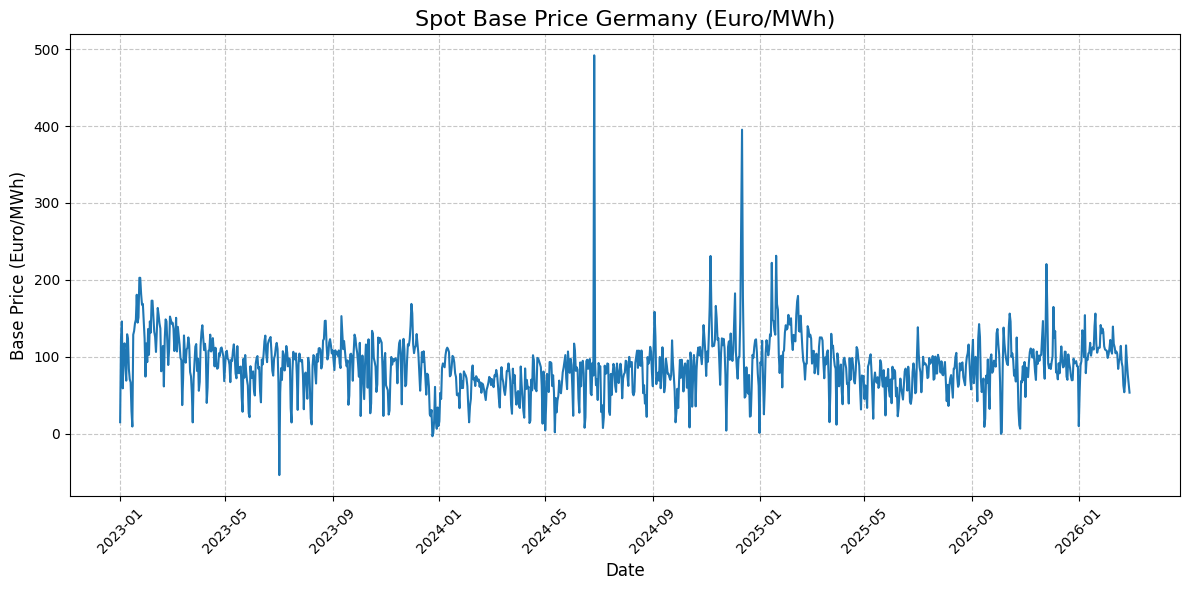

In [9]:
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format for proper plotting
df_selected['Date'] = pd.to_datetime(df_selected['Date'])

# Create the plot
plt.figure(figsize=(12, 6)) # Set a good figure size
plt.plot(df_selected['Date'], df_selected['Base'])

# Set the title and labels
plt.title('Spot Base Price Germany (Euro/MWh)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Base Price (Euro/MWh)', fontsize=12)

# Add grid and rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Display the plot
plt.show()

Let's visualize the 'Base' values against the 'Date'. We'll use `matplotlib` for this, a popular plotting library in Python. Ensure the 'Date' column is in datetime format for proper plotting.

First, we need to import the `pandas` library, which is very useful for working with data in Python, especially for handling Excel and CSV files.

In [1]:
import pandas as pd

Now, we will select only the columns you requested: 'D1 (01:00 - 02:00)', 'O1 (12:00 - 13:00)', 'U1 (18:00 - 19:00)', 'AA1 (Base)', and 'AB1 (Date)'. We'll create a new DataFrame with just these columns.

In [5]:
# Define the list of columns to extract with the correct names
columns_to_extract = [
    '01:00-02:00',
    '12:00-13:00',
    '18:00-19:00',
    'Base',
    'Date'
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_to_extract].copy()

# Display the first few rows of the new DataFrame
print("Extracted specified columns:")
display(df_selected.head())

Extracted specified columns:


,01:00-02:00,12:00-13:00,18:00-19:00,Base,Date
0,-1.07,-0.79,55.57,14.9133,2023-01-01
1,51.67,144.38,174.74,123.8200,2023-01-02
2,120.00,164.50,168.93,145.9546,2023-01-03
3,70.67,80.89,72.28,58.9417,2023-01-04
4,0.07,140.91,194.67,107.4554,2023-01-05


Finally, we will save this new DataFrame, containing only your selected data, into a new CSV file named `Spot_de_hourly.csv`. The `index=False` part makes sure that pandas doesn't write the DataFrame's internal row numbers into your CSV file.

In [6]:
# Define the output CSV file name
output_csv_file = 'Spot_de_hourly.csv'

# Save the selected data to a CSV file
df_selected.to_csv(output_csv_file, index=False)

print(f"Successfully saved the extracted data to '{output_csv_file}'.")

Successfully saved the extracted data to 'Spot_de_hourly.csv'.


# Task
Calculate the 95% Historical Value at Risk (VaR) for the 'Base' spot price series in the `df_selected` DataFrame, and then summarize the VaR calculation and its implications.

## Prepare Spot Price Data

### Subtask:
Select the 'Base' column from the `df_selected` DataFrame, ensure it is numeric, and handle any missing values. This will be the spot price series used for VaR calculation.


**Reasoning**:
The subtask requires extracting the 'Base' column, ensuring it is numeric, and handling missing values. I will perform these operations in a single code block to prepare the 'spot_prices' series for VaR calculation.



In [10]:
import numpy as np

# 1. Extract the 'Base' column and store it in a new Series
spot_prices = df_selected['Base'].copy()

# 2. Convert the spot_prices Series to a numeric data type, coercing any non-numeric values to NaN
spot_prices = pd.to_numeric(spot_prices, errors='coerce')

# 3. Remove any missing values (NaN) from the spot_prices Series
spot_prices.dropna(inplace=True)

# Display the first few values and check data type and shape to confirm the operations
print("First 5 values of spot_prices series:")
print(spot_prices.head())
print(f"\nData type of spot_prices: {spot_prices.dtype}")
print(f"Number of missing values in spot_prices after dropping: {spot_prices.isnull().sum()}")
print(f"Shape of spot_prices: {spot_prices.shape}")

First 5 values of spot_prices series:
0     14.9133
1    123.8200
2    145.9546
3     58.9417
4    107.4554
Name: Base, dtype: float64

Data type of spot_prices: float64
Number of missing values in spot_prices after dropping: 0
Shape of spot_prices: (1155,)


## Calculate Daily Returns

### Subtask:
Compute the daily percentage changes (returns) from the selected spot price series. Value at Risk is typically calculated on the returns, not the raw prices.


**Reasoning**:
To calculate the daily returns, I will apply the `.pct_change()` method to the `spot_prices` series, multiply by 100 to express as percentages, drop any resulting NaN values, and then display the head and descriptive statistics to verify the calculation, as specified in the instructions.



In [11]:
import pandas as pd

# 1. Calculate the daily percentage change of the spot_prices series
daily_returns = spot_prices.pct_change()

# 2. Multiply the returns by 100 to express them as percentages
daily_returns = daily_returns * 100

# 3. Drop any NaN values that result from the .pct_change() operation
daily_returns.dropna(inplace=True)

# 5. Print the first few values of daily_returns and its descriptive statistics
print("First 5 values of daily_returns series (in %):")
print(daily_returns.head())
print("\nDescriptive statistics for daily_returns (in %):")
print(daily_returns.describe())

First 5 values of daily_returns series (in %):
1    730.265602
2     17.876434
3    -59.616415
4     82.307942
5      9.322845
Name: Base, dtype: float64

Descriptive statistics for daily_returns (in %):
count    1154.000000
mean       33.019438
std       361.292648
min      -693.953968
25%       -17.395215
50%        -2.715821
75%        17.838645
max      9632.830505
Name: Base, dtype: float64


## Calculate Historical VaR

### Subtask:
Calculate the 95% Historical Value at Risk (VaR) for the daily returns. This involves finding the appropriate percentile of the sorted daily returns.


**Reasoning**:
To calculate the 95% Historical Value at Risk (VaR), I will sort the `daily_returns` and find the 5th percentile, which represents the VaR at the 95% confidence level. I will then display the calculated VaR.



In [12]:
confidence_level = 0.95
# Calculate the percentile corresponding to the VaR
# For a 95% VaR, we look for the 5th percentile (100% - 95%)
var_95 = np.percentile(daily_returns, (1 - confidence_level) * 100)

print(f"The 95% Historical Value at Risk (VaR) is: {var_95:.2f}%")

The 95% Historical Value at Risk (VaR) is: -54.12%


## Summary of 95% Historical Value at Risk (VaR)

The calculated 95% Historical Value at Risk (VaR) for the 'Base' spot price series is **-54.12%**.

**Implications:**

This means that, based on historical daily returns, there is a 5% chance that the daily loss in the 'Base' spot price will be equal to or greater than 54.12%.

In other words, we can be 95% confident that the maximum daily loss will not exceed 54.12% of the investment value on a given day, under normal market conditions and assuming past performance is indicative of future risk.

This metric is crucial for risk management as it quantifies the potential downside risk of the asset over a specific time horizon (daily) and at a given confidence level (95%). It helps in making informed decisions regarding capital allocation, hedging strategies, and overall risk exposure.

## Summary:

### Q&A
The 95% Historical Value at Risk (VaR) for the 'Base' spot price series is -54.12%. This implies that, based on historical daily returns, there is a 5% chance that the daily loss in the 'Base' spot price will be equal to or greater than 54.12%. In other words, one can be 95% confident that the maximum daily loss will not exceed 54.12% of the investment value on a given day, assuming normal market conditions and historical performance as an indicator of future risk.

### Data Analysis Key Findings
*   The 'Base' column was successfully extracted, converted to a numeric `float64` data type, and cleaned of 0 missing values, resulting in a `spot_prices` series with 1155 entries ready for analysis.
*   Daily percentage changes (`daily_returns`) were computed from the `spot_prices`, ranging from a minimum of -693.95% to a maximum of 9632.83%, with a mean of 33.02% and a standard deviation of 361.29%.
*   The 95% Historical Value at Risk (VaR) for the daily returns was calculated to be -54.12%.

### Insights or Next Steps
*   The high VaR of -54.12% suggests a considerable level of historical downside risk for the 'Base' spot price, warranting careful consideration for risk management and capital allocation strategies.
*   Further analysis could involve exploring different VaR methodologies (e.g., parametric VaR, Monte Carlo VaR) or backtesting this historical VaR against actual market movements to assess its accuracy and reliability.


# Task
Calculate the squared daily returns from the `daily_returns` series and store them in a new series named `squared_daily_returns`.

## Calculate Squared Returns

### Subtask:
Compute the squared daily returns from the `daily_returns` series. This will be used for the time series and distributional plots of squared returns.


**Reasoning**:
To calculate the squared daily returns, I will square each value in the `daily_returns` series, store the result in `squared_daily_returns`, and then display its head and descriptive statistics as requested.



In [13]:
import numpy as np

# 1. Square each value in the daily_returns Series
squared_daily_returns = daily_returns**2

# 2. Print the first few values of squared_daily_returns
print("First 5 values of squared_daily_returns series:")
print(squared_daily_returns.head())

# 3. Print the descriptive statistics for squared_daily_returns
print("\nDescriptive statistics for squared_daily_returns:")
print(squared_daily_returns.describe())

First 5 values of squared_daily_returns series:
1    533287.849239
2       319.566876
3      3554.116934
4      6774.597247
5        86.915432
Name: Base, dtype: float64

Descriptive statistics for squared_daily_returns:
count    1.154000e+03
mean     1.315095e+05
std      2.864501e+06
min      5.415831e-05
25%      5.382099e+01
50%      3.100030e+02
75%      1.420655e+03
max      9.279142e+07
Name: Base, dtype: float64


## Generate Time Series Plots

### Subtask:
Create a figure with two subplots: one showing the time series of `daily_returns` and another showing the time series of `squared_daily_returns`. Each plot will have appropriate titles and labels.


**Reasoning**:
To visualize the time series of `daily_returns` and `squared_daily_returns`, I will create a Python code block using `matplotlib.pyplot` to generate two subplots as requested.

